#**Data Wrangling (Part 2)Los Angeles County Urban Trees**

**Summary**

The purpose of this notebook is to continue cleaning raw urban trees data, and to continue number of trees per bounded region.The notebook shows the steps taken to prepare the raw dataset for exploratory data analysis and statistical analysis. A brief summary of the content of this notebook is below:

**Cleaning Data**

**Urban trees Data (Starting with 1.7 Million Trees)**

i. Removing rows where a tree information represents a vacant site. 

ii. Cleaning botanical names of trees. 

iii. Cleaning tree geometry information. (Ending with 1.4 Million Trees)

**Importing Data**

LA county data on median income were imported from https://geohub.lacity.org/search

**Preparing Data**

Calculate trees/unit area according to boundaries set by US Cenus Tract.


In [1]:
#This notebook is done google colab.

#Mounting your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
#Importing relevant packages
import pandas as pd
import numpy as np

!pip install geopandas
import geopandas as gpd

In [33]:
#Importing previously exported raw trees data
path = '/content/drive/My Drive/Public Trees - Wes/LAtrees.csv'
trees = pd.read_csv(path)

#Selecting relevant columns, since this is a very big file
finalcols = ["city","geometry","species","height","dbh","street","botanical","botanicaln"]
trees = trees[finalcols]

#Cleaning 'species'
trees["species"] = trees["species"].str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

#Overview of dataframe
trees.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,4,5,6,9,10,11,12,13,14,16,17,18,19,20,22,24,26,27,32,34,35,36,37,38,39,42,43,44,45,50,51,53,55,56,58,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,80,81,82,84,85,86,87,88,89,90,92,93,94,97,100,101,104,105,107,108,110,111,112,113,115,121,122,123,125,126,130,131,133,135,137,138,145,147,149,150,151,153,155,156,157,159,164,169,170,171,172,173,174,175,176,177,178,179,181,182,184,185,186) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1673610 entries, 0 to 1673609
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   city        1673610 non-null  object
 1   geometry    1673610 non-null  object
 2   species     1519245 non-null  object
 3   height      723143 non-null   object
 4   dbh         562566 non-null   object
 5   street      527881 non-null   object
 6   botanical   469450 non-null   object
 7   botanicaln  358435 non-null   object
dtypes: object(8)
memory usage: 102.1+ MB


In [34]:
#removing species that contains 'vacant'
vacant_df = trees[(trees["species"] == 'vacant') | (trees["species"] == 'vacant_site')]
clean_trees = trees.drop(vacant_df.index, axis=0)

#Overview of tree species
clean_trees["species"].value_counts()

crape_myrtle          88385
mexican_fan_palm      64561
southern_magnolia     61801
american_sweetgum     58465
jacaranda             42295
                      ...  
festival_sweetgum         1
zadd_15                   1
red_laurel                1
ginkgo_biloba             1
carolina_buckthorn        1
Name: species, Length: 1497, dtype: int64

In [35]:
#ty: https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#from-wkt-format

#Using shapely.wkt sub-module to parse wkt format:
clean_trees['geometry'] = clean_trees['geometry'].apply(wkt.loads)
clean_trees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485869 entries, 0 to 1673609
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   city        1485869 non-null  object
 1   geometry    1485869 non-null  object
 2   species     1331504 non-null  object
 3   height      604274 non-null   object
 4   dbh         490649 non-null   object
 5   street      445619 non-null   object
 6   botanical   432015 non-null   object
 7   botanicaln  272541 non-null   object
dtypes: object(8)
memory usage: 102.0+ MB


In [36]:
#Importing data on geometry type infomation
path = '/content/drive/My Drive/Public Trees - Wes/propercitytrees.csv'
goodcities = pd.read_csv(path)

#Overview of dataframe
goodcities.info()

# viewing the first few columns of the dataset
goodcities.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49 non-null     object
 1   ok          29 non-null     object
 2   -118        8 non-null      object
 3   0           7 non-null      object
 4   -95         4 non-null      object
 5   1.00E+06    8 non-null      object
 6   125         1 non-null      object
dtypes: object(7)
memory usage: 2.8+ KB


,Unnamed: 0,ok,-118,0,-95,1.00E+06,125
0,agoura-hills,NaN,y,y,NaN,NaN,NaN
1,alhambra,NaN,NaN,NaN,y,NaN,NaN
2,arcadia,NaN,NaN,NaN,NaN,y,NaN
3,bell-gardens,NaN,NaN,NaN,NaN,y,NaN
4,diamond-bar,NaN,NaN,NaN,NaN,y,NaN


Explanation of columns:

'Unnamed: 0' = Name of county

'ok' = 29 counties with correct geometry (type ok)

'-118' = 8 counties with incorrect geometry (type -118)

'0' = 7 counties with incorrect geometry (type 0)

'-95' = 4 counties with incorrect geometry (type 0)

'1.00E+06' = 8 counties with incorrect geometry (type 1.00E+06)

'125' = 1 counties with incorrect geometry (type 125)

In [37]:
#Creating a list of 29 counties with correct geometry (type ok)
goodcities_list = []
for i,j in zip(goodcities["ok"],goodcities["Unnamed: 0"]):
  if i == 'y':
    goodcities_list.append(j)

#Filtering main tree dataframe (clean_trees) with 29 counties with correct geometry (type ok)
goodtrees = clean_trees.query("city in @goodcities_list")

#Converting to geopandas dataframe
geo_goodtrees = gpd.GeoDataFrame(goodtrees, geometry='geometry')

#Overview of dataframe
goodtrees.info()

#The Coordinate Reference System of this dataframe is 4326

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120493 entries, 40923 to 1673609
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   city        1120493 non-null  object  
 1   geometry    1120493 non-null  geometry
 2   species     1086694 non-null  object  
 3   height      398555 non-null   object  
 4   dbh         284542 non-null   object  
 5   street      312007 non-null   object  
 6   botanical   241155 non-null   object  
 7   botanicaln  218649 non-null   object  
dtypes: geometry(1), object(7)
memory usage: 76.9+ MB


In [38]:
#Creating a list of 8 counties with incorrect geometry (type -118)
minus118_list = []
for i,j in zip(goodcities["-118"],goodcities["Unnamed: 0"]):
  if i == 'y':
    minus118_list.append(j)

#Filtering main tree dataframe (clean_trees) with 8 counties with incorrect geometry (type -118)
minus118_trees = clean_trees.query("city in @minus118_list")

#Converting to geopandas dataframe
geo_minus118 = gpd.GeoDataFrame(minus118_trees, geometry='geometry')

#7 of these counties have geometry (type 0) mixed in. Here we will remove the geometry (type 0) data points.
#Spilting geometry information to longitude and latitude
geo_minus118['lon'] = geo_minus118['geometry'].x
geo_minus118['lat'] = geo_minus118['geometry'].y

#Remove geometry (type 0)
geo_minus118 = geo_minus118[geo_minus118["lon"]<-117]

#Viewing the first few columns of the dataset
geo_minus118.head()

#The Coordinate Reference System of this dataframe is 4326

,city,geometry,species,height,dbh,street,botanical,botanicaln,lon,lat
0,agoura-hills,POINT (-118.72476 34.13622),coast_live_oak,01-15,0-6,AGOURA RD,Quercus agrifolia,NaN,-118.724759,34.136224
1,agoura-hills,POINT (-118.72499 34.13624),coast_live_oak,01-15,0-6,AGOURA RD,Quercus agrifolia,NaN,-118.724987,34.136245
2,agoura-hills,POINT (-118.72513 34.13621),coast_live_oak,15-30,07-12,AGOURA RD,Quercus agrifolia,NaN,-118.725128,34.136208
3,agoura-hills,POINT (-118.72530 34.13617),coast_live_oak,01-15,07-12,AGOURA RD,Quercus agrifolia,NaN,-118.725300,34.136173
4,agoura-hills,POINT (-118.72545 34.13615),coast_live_oak,01-15,0-6,AGOURA RD,Quercus agrifolia,NaN,-118.725446,34.136147


In [39]:
#Creating a list of 8 counties with incorrect geometry (type 1.00E+06)
e6_list = []
for i,j in zip(goodcities["1.00E+06"],goodcities["Unnamed: 0"]):
  if i == 'y':
    e6_list.append(j)

#Filtering main tree dataframe (clean_trees) with 8 counties with incorrect geometry (type 1.00E+06)
e6_trees = clean_trees.query("city in @e6_list")

#Converting to geopandas dataframe
geo_e6_trees = gpd.GeoDataFrame(e6_trees, geometry='geometry')

#used .crs to check crs of original shapefile of the county data
#changing the Coordinate Reference System of this dataframe to match the dataframe with geometry (type ok)
geo_e6_trees.set_crs(epsg=2229 , inplace=True)
geo_e6_trees["geometry"] = geo_e6_trees["geometry"].to_crs("EPSG:4326")

#Viewing the first few columns of the dataset
geo_e6_trees.head()

,city,geometry,species,height,dbh,street,botanical,botanicaln
25239,arcadia,POINT (-118.03557 34.11178),NaN,NaN,NaN,NaN,NaN,NaN
25240,arcadia,POINT (-118.03558 34.11232),NaN,NaN,NaN,NaN,NaN,NaN
25241,arcadia,POINT (-118.03559 34.11215),NaN,NaN,NaN,NaN,NaN,NaN
25242,arcadia,POINT (-118.03559 34.11191),NaN,NaN,NaN,NaN,NaN,NaN
25243,arcadia,POINT (-118.02596 34.12633),NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Creating a list of 4 counties with incorrect geometry (type -95)
minus95_list = []
for i,j in zip(goodcities["-95"],goodcities["Unnamed: 0"]):
  if i == 'y':
    minus95_list.append(j)

#Filtering main tree dataframe (clean_trees) with 8 counties with incorrect geometry (type 1.00E+06)
minus95_trees = clean_trees.query("city in @minus95_list")

#Converting to geopandas dataframe
geo_minus95_trees = gpd.GeoDataFrame(minus95_trees, geometry='geometry')

#used .crs to check crs of original shapefile of the county data
#changing the Coordinate Reference System of this dataframe to match the dataframe with geometry (type ok)
geo_minus95_trees.set_crs(epsg=4269 , inplace=True)
geo_minus95_trees["geometry"] = geo_minus95_trees["geometry"].to_crs("EPSG:4326")

#Viewing the first few columns of the dataset
geo_minus95_trees.head()

,city,geometry,species,height,dbh,street,botanical,botanicaln
5118,alhambra,POINT (-96.00147 40.00029),black_acacia,45-60,13-18,ALMANSOR PARK,NaN,Acacia melanoxylon
5119,alhambra,POINT (-96.00147 40.00029),black_acacia,30-45,07-12,CHAPEL AV /S,NaN,Acacia melanoxylon
5120,alhambra,POINT (-96.00147 40.00029),black_acacia,30-45,13-18,GRANADA AV /N,NaN,Acacia melanoxylon
5121,alhambra,POINT (-96.00147 40.00029),black_acacia,15-30,07-12,GRANADA PARK,NaN,Acacia melanoxylon
5122,alhambra,POINT (-96.00147 40.00029),black_acacia,15-30,13-18,GRANADA PARK,NaN,Acacia melanoxylon


It appears that the Coordinate Reference System post conversion was not successful. The geometry should be around POINT (-118 34). This could mean that the original CRS information was inaccurate. A future step could be extract accurate geometry information for these trees using a geolocator on the physical addresses. Since these geometry (type -95) trees represent 3.4% of the clean_trees dataset, we will ignore them for now.

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1435869 entries, 25239 to 1562536
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   city        1435869 non-null  object  
 1   geometry    1435869 non-null  geometry
 2   species     1281504 non-null  object  
 3   height      566930 non-null   object  
 4   dbh         453308 non-null   object  
 5   street      395622 non-null   object  
 6   botanical   417701 non-null   object  
 7   botanicaln  236855 non-null   object  
 8   lon         65409 non-null    float64 
 9   lat         65409 non-null    float64 
dtypes: float64(2), geometry(1), object(7)
memory usage: 120.5+ MB


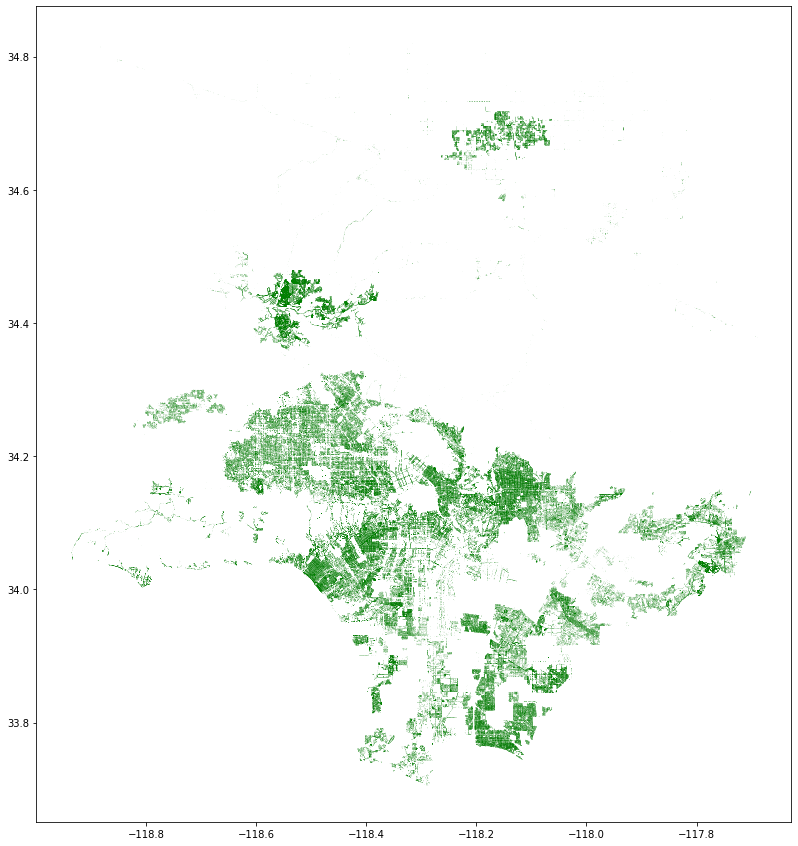

In [41]:
#Combining transformed geometry trees into one dataframe
combineddf = geo_e6_trees.append(geo_goodtrees)
combineddf = combineddf.append(geo_minus118)

#Overview of dataframe
combineddf.info()

#Plotting to see individual trees
ax = combineddf.plot(figsize=(15, 15), color='green',alpha=0.1, markersize=0.01)

# Calculating number of trees within a boundary defined by US Census Tract in Los Angeles County

Here I will use US Census Tract boundary information in income_df with urban tree point geometry data in combineddf for our calculations.

I have attempted to calculate using both dataframe and Google Colab does not have enough RAM for it. 

Hence, I will split the income_df into 5 parts, and proceed to calculations separately. 

The resultant will be exported and then combined in the next notebook.

In [42]:
#Import median income dataset from download files from https://geohub.lacity.org/datasets/lacounty::median-household-income-by-census-tract
#All the 4 files related to geospatial data should be placed in one folder.
#example: .shp, .prj, .dbf, .shx
#ty: https://www.kaggle.com/learn-forum/122966

income_df = gpd.read_file("/content/drive/My Drive/Public Trees - Wes/LA median income/Median_Household_Income_by_Census_Tract.shp", encoding="utf-8")

#'B19013e1' is the col for median income defined by the US Census tract boundary
#Select relevant columns
income_df = income_df[['tract','B19013e1','geometry']]

#Overview of dataframe. 
#Check data type so we can see that this is not a normal dataframe, but a GEOdataframe
income_df.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tract     2344 non-null   object  
 1   B19013e1  2344 non-null   int64   
 2   geometry  2344 non-null   geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 55.1+ KB


In [43]:
#spliting income_df into 5 parts
income1 = income_df.iloc[0:500]
income2 = income_df.iloc[500:1000]
income3 = income_df.iloc[1000:1500]
income4 = income_df.iloc[1500:2000]
income5 = income_df.iloc[2000:2344]

In [ ]:
#Calculation for income part 1
pointsperregion1 = []

for j in income1['geometry']:
  counts = 0
  for i in combineddf['geometry']:
    result = i.intersects(j)
    if result == True:
      counts += 1
  pointsperregion1.append(counts)
  print(f'done with {len(pointsperregion1)} poly with {counts}')

income1['counts'] = np.array(pointsperregion1)

income1.to_csv('income1.csv')
!cp income1.csv "/content/drive/My Drive/Public Trees - Wes/"

done with 1 poly with 74
done with 2 poly with 0
done with 3 poly with 201
done with 4 poly with 719
done with 5 poly with 87
done with 6 poly with 63
done with 7 poly with 300
done with 8 poly with 339
done with 9 poly with 406
done with 10 poly with 709
done with 11 poly with 938
done with 12 poly with 576
done with 13 poly with 721
done with 14 poly with 1
done with 15 poly with 2572
done with 16 poly with 1237
done with 17 poly with 0
done with 18 poly with 0
done with 19 poly with 0
done with 20 poly with 0
done with 21 poly with 0
done with 22 poly with 0
done with 23 poly with 7
done with 24 poly with 0
done with 25 poly with 0
done with 26 poly with 376
done with 27 poly with 429
done with 28 poly with 264
done with 29 poly with 12
done with 30 poly with 206
done with 31 poly with 719
done with 32 poly with 216
done with 33 poly with 49
done with 34 poly with 0
done with 35 poly with 9
done with 36 poly with 285
done with 37 poly with 39
done with 38 poly with 36
done with 39 p

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
#Calculation for income part 2
pointsperregion2 = []

for j in income2['geometry']:
  counts = 0
  for i in combineddf['geometry']:
    result = i.intersects(j)
    if result == True:
      counts += 1
  pointsperregion2.append(counts)
  print(f'done with {len(pointsperregion2)} poly with {counts}')

income2['counts'] = np.array(pointsperregion2)

income2.to_csv('income2.csv')
!cp income2.csv "/content/drive/My Drive/Public Trees - Wes/"

done with 1 poly with 582
done with 2 poly with 148
done with 3 poly with 1722
done with 4 poly with 936
done with 5 poly with 833
done with 6 poly with 383
done with 7 poly with 869
done with 8 poly with 3385
done with 9 poly with 1091
done with 10 poly with 1525
done with 11 poly with 1100
done with 12 poly with 1056
done with 13 poly with 258
done with 14 poly with 136
done with 15 poly with 51
done with 16 poly with 217
done with 17 poly with 230
done with 18 poly with 21
done with 19 poly with 3630
done with 20 poly with 856
done with 21 poly with 859
done with 22 poly with 1894
done with 23 poly with 5181
done with 24 poly with 2862
done with 25 poly with 2182
done with 26 poly with 854
done with 27 poly with 650
done with 28 poly with 587
done with 29 poly with 567
done with 30 poly with 541
done with 31 poly with 185
done with 32 poly with 213
done with 33 poly with 59
done with 34 poly with 480
done with 35 poly with 1065
done with 36 poly with 137
done with 37 poly with 1490


/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
#Calculation for income part 3
pointsperregion3 = []

for j in income3['geometry']:
  counts = 0
  for i in combineddf['geometry']:
    result = i.intersects(j)
    if result == True:
      counts += 1
  pointsperregion3.append(counts)
  print(f'done with {len(pointsperregion3)} poly with {counts}')

income3['counts'] = np.array(pointsperregion3)

income3.to_csv('income3.csv')
!cp income3.csv "/content/drive/My Drive/Public Trees - Wes/"

done with 1 poly with 0
done with 2 poly with 0
done with 3 poly with 918
done with 4 poly with 98
done with 5 poly with 1
done with 6 poly with 29
done with 7 poly with 850
done with 8 poly with 490
done with 9 poly with 0
done with 10 poly with 131
done with 11 poly with 79
done with 12 poly with 205
done with 13 poly with 145
done with 14 poly with 336
done with 15 poly with 0
done with 16 poly with 2076
done with 17 poly with 131
done with 18 poly with 514
done with 19 poly with 698
done with 20 poly with 0
done with 21 poly with 0
done with 22 poly with 0
done with 23 poly with 0
done with 24 poly with 0
done with 25 poly with 165
done with 26 poly with 0
done with 27 poly with 535
done with 28 poly with 903
done with 29 poly with 275
done with 30 poly with 463
done with 31 poly with 682
done with 32 poly with 53
done with 33 poly with 78
done with 34 poly with 72
done with 35 poly with 71
done with 36 poly with 252
done with 37 poly with 136
done with 38 poly with 112
done with 3

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
#Calculation for income part 4
pointsperregion4 = []

for j in income4['geometry']:
  counts = 0
  for i in combineddf['geometry']:
    result = i.intersects(j)
    if result == True:
      counts += 1
  pointsperregion4.append(counts)
  print(f'done with {len(pointsperregion4)} poly with {counts}')

income4['counts'] = np.array(pointsperregion4)

income4.to_csv('income4.csv')
!cp income4.csv "/content/drive/My Drive/Public Trees - Wes/"

done with 1 poly with 469
done with 2 poly with 515
done with 3 poly with 397
done with 4 poly with 37
done with 5 poly with 428
done with 6 poly with 818
done with 7 poly with 577
done with 8 poly with 328
done with 9 poly with 784
done with 10 poly with 2305
done with 11 poly with 2135
done with 12 poly with 1043
done with 13 poly with 947
done with 14 poly with 398
done with 15 poly with 1049
done with 16 poly with 1648
done with 17 poly with 967
done with 18 poly with 1313
done with 19 poly with 434
done with 20 poly with 593
done with 21 poly with 15
done with 22 poly with 11
done with 23 poly with 8
done with 24 poly with 78
done with 25 poly with 105
done with 26 poly with 192
done with 27 poly with 9
done with 28 poly with 2074
done with 29 poly with 919
done with 30 poly with 970
done with 31 poly with 801
done with 32 poly with 1154
done with 33 poly with 667
done with 34 poly with 639
done with 35 poly with 822
done with 36 poly with 734
done with 37 poly with 413
done with 

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [ ]:
#Calculation for income part 5
pointsperregion5 = []

for j in income5['geometry']:
  counts = 0
  for i in combineddf['geometry']:
    result = i.intersects(j)
    if result == True:
      counts += 1
  pointsperregion5.append(counts)
  print(f'done with {len(pointsperregion5)} poly with {counts}')

income5['counts'] = np.array(pointsperregion5)

income5.to_csv('income5.csv')
!cp income5.csv "/content/drive/My Drive/Public Trees - Wes/"

done with 1 poly with 0
done with 2 poly with 0
done with 3 poly with 0
done with 4 poly with 0
done with 5 poly with 1339
done with 6 poly with 0
done with 7 poly with 0
done with 8 poly with 64
done with 9 poly with 0
done with 10 poly with 0
done with 11 poly with 0
done with 12 poly with 87
done with 13 poly with 140
done with 14 poly with 0
done with 15 poly with 0
done with 16 poly with 161
done with 17 poly with 0
done with 18 poly with 96
done with 19 poly with 0
done with 20 poly with 23
done with 21 poly with 690
done with 22 poly with 1
done with 23 poly with 0
done with 24 poly with 0
done with 25 poly with 226
done with 26 poly with 0
done with 27 poly with 538
done with 28 poly with 0
done with 29 poly with 1266
done with 30 poly with 1612
done with 31 poly with 169
done with 32 poly with 841
done with 33 poly with 346
done with 34 poly with 0
done with 35 poly with 0
done with 36 poly with 0
done with 37 poly with 0
done with 38 poly with 0
done with 39 poly with 0
done 

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
